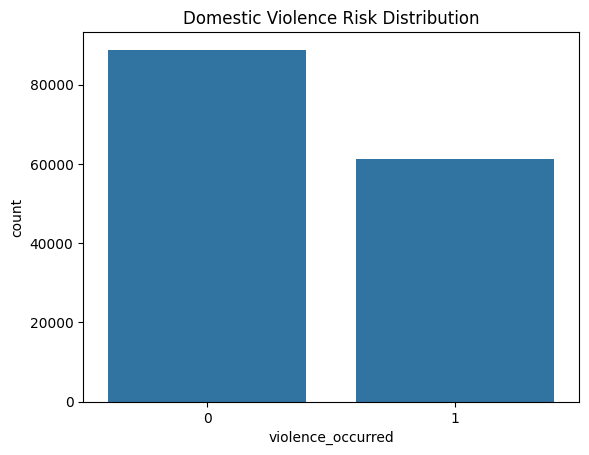

🔍 Accuracy: 0.9371333333333334
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     17765
           1       0.94      0.90      0.92     12235

    accuracy                           0.94     30000
   macro avg       0.94      0.93      0.93     30000
weighted avg       0.94      0.94      0.94     30000

🧮 Confusion Matrix:
 [[17043   722]
 [ 1164 11071]]

⭐ Feature Importance:
 past_violence           0.248069
partner_alcoholic       0.244400
self_substance_abuse    0.163892
previous_reports        0.076257
has_support_system      0.058482
employment_status       0.051287
mental_health_issues    0.050765
income                  0.036952
education               0.031149
disability              0.018319
housing_situation       0.010481
has_partner             0.003634
age                     0.002926
number_of_children      0.001797
marital_status          0.001593
dtype: float64


['scaler.pkl']

In [9]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

# 2. Load Dataset
df = pd.read_csv('domestic_violence_data.csv') 

# 3. Encode Categorical Variables
categorical_cols = [
    'education', 'income', 'marital_status', 'has_partner',
    'partner_alcoholic', 'has_support_system', 'past_violence',
    'mental_health_issues', 'employment_status', 'housing_situation',
    'disability', 'self_substance_abuse'
]

# Apply label encoding to all categorical features
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    le_dict[col] = le  # Save encoders if needed later

# 4. Drop missing values if any
df.dropna(inplace=True)

# 5. EDA (Optional)
sns.countplot(x='violence_occurred', data=df)
plt.title('Domestic Violence Risk Distribution')
plt.show()

# 6. Feature Selection
X = df.drop(['violence_occurred'], axis=1)
y = df['violence_occurred']

# 7. Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# 9. Train Model
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# 10. Evaluate
y_pred = model.predict(X_test)
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 11. Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n⭐ Feature Importance:\n", feature_importance)

# 12. Save Model and Scaler
joblib.dump(model, 'domestic_violence_model.pkl')
joblib.dump(scaler, 'scaler.pkl')